# Analysis and Simulation Report on Profit Improvement Strategies

## Author: Soumyadeep Bose
## Date: May 29, 2024

---


## Executive Summary

In this report, we analyze the cost, revenue, and profitability of our business operations to identify key areas for improvement. Based on our findings, we propose strategies to reduce costs and boost revenue, and simulate their impact on overall profitability. The simulation results suggest significant improvements in profit margins, indicating the effectiveness of the proposed strategies.


## Introduction

### Background and Context
Our business has been experiencing fluctuating profits, prompting a detailed analysis to identify cost drivers and revenue opportunities.

### Objectives
- To analyze cost, revenue, and profitability.
- To propose strategies for cost reduction and revenue enhancement.
- To simulate the impact of these strategies on overall profitability.



## Data Overview

### Dataset Description
The dataset includes order-level data with variables such as order value, discounts, payment processing fees, delivery fees, commission fees, and profit.

### Key Variables
- **Order ID:** A unique identifier for each order.
- **Customer ID:** A unique identifier for each customer.
- **Restaurant ID:** A unique identifier for each restaurant.
- **Order Date and Time:** The timestamp indicating when the order was placed.
- **Delivery Date and Time:** The timestamp indicating when the order was delivered.
- **Order Value**: Total value of the order.
- **Delivery Fee:** The fee charged for delivering the order.
- **Payment Method:** The method used by the customer to pay for the order.
- **Discounts and Offers:** The types of discounts or promotional offers applied to the order.
- **Discount Amount:** The monetary value of the discount applied to the order.
- **Commission Fee:** The revenue earned from commissions charged to restaurants.
- **Payment Processing Fee:** The fee charged for processing the customer's payment.
- **Refunds/Chargebacks:** The amount refunded to the customer or chargebacks incurred.
- **Profit:** Calculated as revenue minus the total cost.

## Assumptions

### Data Assumptions
- **Completeness:** The dataset is complete and contains all relevant order information, with no missing or unrecorded transactions.
- **Accuracy:** The data is accurate and free from errors. This includes correct values for order amounts, fees, discounts, and other financial metrics.
- **Timeliness:** The dataset is up-to-date and reflects the current state of operations. Any changes in business practices, pricing, or fee structures are included in the dataset.
- **Consistency:** Data is consistent across all entries. For example, the same payment processing fee structure is applied to all orders without exception.
- **Relevance:** All data fields are relevant and necessary for the analysis. There are no extraneous data points that could skew the analysis.
- **Standardization:** The dataset follows a standardized format, ensuring uniformity in data entry. This includes consistent units of measurement, date formats, and categorical labels.
### Business Assumptions
- **Customer Behavior:** Customer behavior and preferences remain consistent over time. Changes in discount strategies or commission rates will not significantly alter the number of orders or customer satisfaction levels.
- **Market Conditions:** External market conditions (e.g., economic factors, competition, food costs) remain stable during the period of analysis and implementation of the proposed strategies.
- **Operational Costs:** Other operational costs not included in the dataset (e.g., Refunds/Chargebacks, staff salaries, marketing expenses) remain unchanged and do not significantly impact profitability.
- **Service Quality:** Changes in discount and commission strategies do not negatively impact the quality of service, delivery times, or customer satisfaction.
- **Scalability:** The proposed strategies can be scaled up without significant additional costs or operational challenges.
- **Regulatory Environment:** There are no regulatory changes affecting pricing, commissions, or delivery operations during the implementation period.
- **Technological Infrastructure:** The technological infrastructure supporting order processing, payment, and delivery is robust and can handle the changes proposed without additional investment.

##  Importing library and setting up the environment:
------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.relativedelta import relativedelta
import random
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns',None)
plt.style.use('ggplot')
colors=['#4C72B0', '#DD8452', '#55A868', '#C44E52', '#8172B2', '#937860', '#64B5CD', '#CCB974','#F08080']


## Loding the dataset:
---------------------

In [2]:
df = pd.read_csv('/kaggle/input/food-delivery-cost-and-profitability/food_orders_new_delhi (1).csv')


## Data Understanding:
----------------

In [3]:
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [4]:
print(f' numbers of row: {df.shape[0]}','\n',f'the numbers of column: {df.shape[1]}')

 numbers of row: 1000 
 the numbers of column: 12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


We can see that only the Discounts and Offers columnn has some null value otherwise there are no null values. also, the data type ofthe  order date and the delivery date are object that need to be converted in Datetimes.

In [6]:
df.describe(include = 'object')

,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Payment Method,Discounts and Offers
count,1000,1000,1000,1000,1000,815
unique,947,621,1000,1000,3,4
top,C7938,R2317,2024-02-01 01:11:52,2024-02-01 02:39:52,Cash on Delivery,10%
freq,3,6,1,1,357,233


In [7]:
df.describe()

,Order ID,Order Value,Delivery Fee,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,500.50,1053.97,28.62,126.99,29.83,28.30
std,288.82,530.98,16.96,43.06,11.63,49.61
min,1.00,104.00,0.00,50.00,10.00,0.00
25%,250.75,597.75,20.00,90.00,20.00,0.00
50%,500.50,1038.50,30.00,127.00,30.00,0.00
75%,750.25,1494.00,40.00,164.00,40.00,50.00
max,1000.00,1995.00,50.00,200.00,50.00,150.00


In [8]:
# chaking for duplicated value in dataset
df.duplicated().sum()

0

In [9]:
df['Discounts and Offers'].value_counts(dropna = False)

Discounts and Offers
10%             233
50 off Promo    201
15% New User    198
NaN             185
5% on App       183
Name: count, dtype: int64

In [10]:
df['Payment Method'].value_counts()

Payment Method
Cash on Delivery    357
Credit Card         337
Digital Wallet      306
Name: count, dtype: int64

## Data Cleaning and Preparation:
-----------------

In [11]:
# Converting data type of order date and delivery date to datetime
df['Order Date and Time'] = pd.to_datetime(df['Order Date and Time'] )
df['Delivery Date and Time'] = pd.to_datetime(df['Delivery Date and Time'])

In [12]:
# Creating new column to calculate time its takes to deliver the food
# Function to calculate duration in hours and minutes
def calculate_duration(start, end):
    duration = relativedelta(end, start)
    return duration.hours*60 + duration.minutes

# Apply the function to calculate the duration
df['Delivery_tiem_minutes'] = df.apply(lambda row: calculate_duration(row['Order Date and Time'], row['Delivery Date and Time']), axis=1)

In [13]:
# funtion to calculate time of day based on hour
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'

df['order_date']=df['Order Date and Time'].dt.date # extract the date from Order Date and Time
df['order_day']=df['Order Date and Time'].dt.day_name() # extract the name of the days from Order Date and Time
df['order_time']=df['Order Date and Time'].dt.hour.apply(categorize_time) # extract the hour from Order Date and Time

In [14]:
# repalcing null value with No Discount.
df['Discounts and Offers']=df['Discounts and Offers'].fillna('No discount')

In [15]:


# Creating a function to extract only the discount percentages
def discount_pecentage(offer):
    offer = str(offer)
    if '%' in offer:
        return int(offer.split('%')[0])
    else:
        return 0

# creating a function to extract only the discounted amount

def discount_amount(offer):
    offer = str(offer)
    if 'off' in offer:
        return int(offer.split('off')[0].strip())
    elif 'No discount' in offer:
        return 0
    else:
        return 0
# creating a new column to store discount_percentages and discount_amount.        
df['discount_percentages'] = df['Discounts and Offers'].apply(discount_pecentage)
df['discount_amount'] = df['Discounts and Offers'].apply(discount_amount)

In [16]:
# Calculate the discounted amount over the order value based on the percentages and assign it where the value of discounted_amount columns is 0.
df.loc[df['discount_amount'] == 0, 'discount_amount'] = df['Order Value'] * df['discount_percentages'] / 100

In [17]:
df[['discount_percentages','discount_amount']]

,discount_percentages,discount_amount
0,5,95.70
1,10,98.60
2,15,140.55
3,0,0.00
4,0,50.00
...,...,...
995,5,41.25
996,0,0.00
997,0,0.00
998,15,212.10


In [18]:
# Crating a column for calculating the percentage of commission based on order values

df['commission_percentage'] = (df['Commission Fee']/df['Order Value'])*100

In [19]:
# calculationg cost,revenue and profit

df['cost']=df['Delivery Fee']+df['Payment Processing Fee']+df['discount_amount']
df['revenue']=df['Commission Fee']
df['profit'] = df['revenue']-df['cost']

In [20]:
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Delivery_tiem_minutes,order_date,order_day,order_time,discount_percentages,discount_amount,commission_percentage,cost,revenue,profit
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,88,2024-02-01,Thursday,None,5,95.70,7.84,142.70,150,7.30
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,35,2024-02-02,Friday,None,10,98.60,20.08,161.60,198,36.40
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,58,2024-01-31,Wednesday,Morning,15,140.55,20.81,215.55,195,-20.55
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,No discount,146,27,0,46,2024-01-16,Tuesday,None,0,0.00,9.98,77.00,146,69.00
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,89,2024-01-29,Monday,None,0,50.00,6.53,130.00,130,0.00


## Exploratory Data Analysis:
--------------

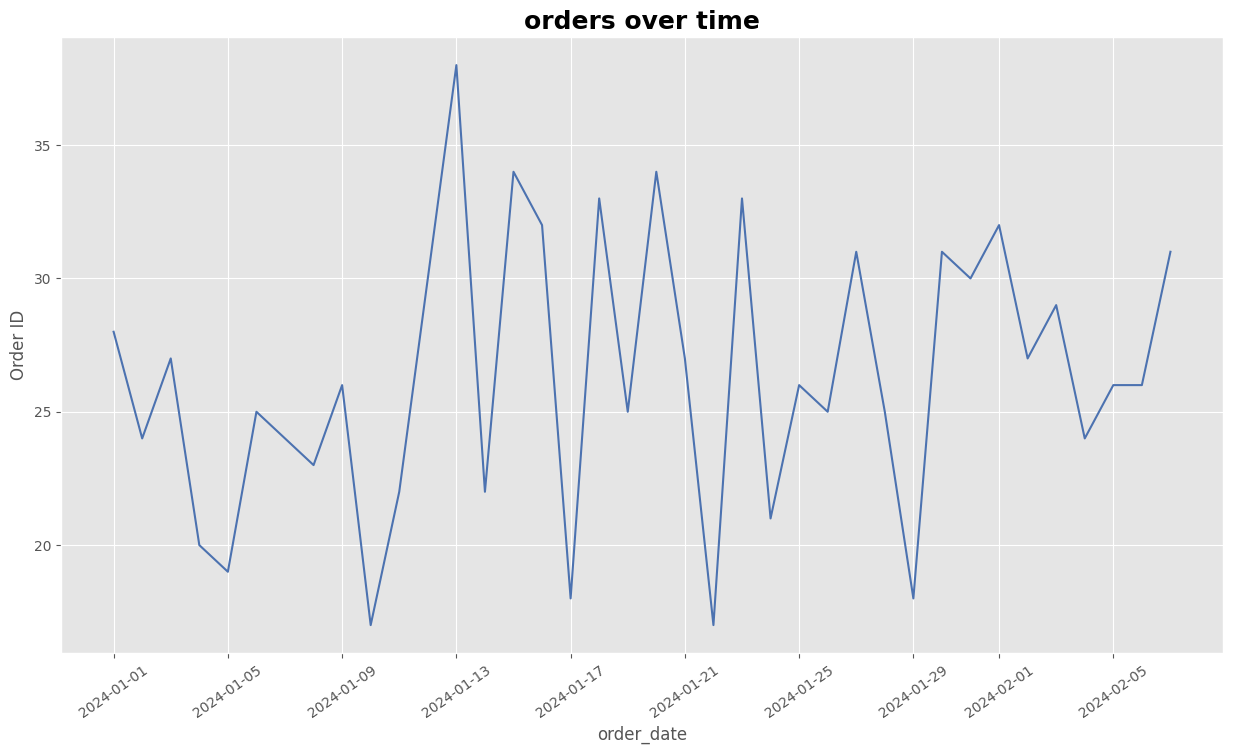

In [21]:
profit_by_date=df.groupby('order_date')['Order ID'].count().reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(data=profit_by_date,x=profit_by_date['order_date'],y=profit_by_date['Order ID'],color=random.choice(colors))
plt.title('orders over time',fontsize = 18,fontweight='bold')
plt.xticks(rotation =35)
plt.show()

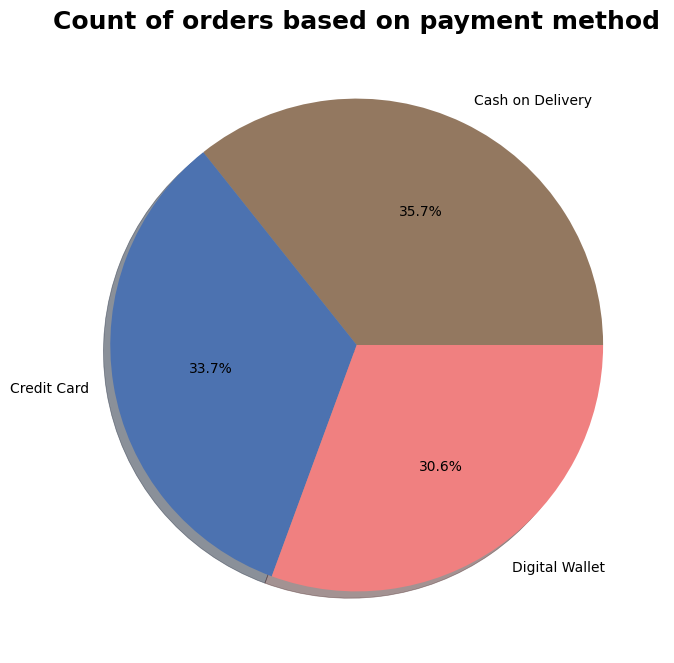

In [22]:
payment_method=df['Payment Method'].value_counts()
plt.figure(figsize=(10,8))
plt.pie(x=payment_method,labels=payment_method.index,autopct='%1.1f%%',shadow=True,colors=random.sample(colors,len(payment_method)))
plt.title('Count of orders based on payment method',fontsize = 18,fontweight='bold')
plt.show()

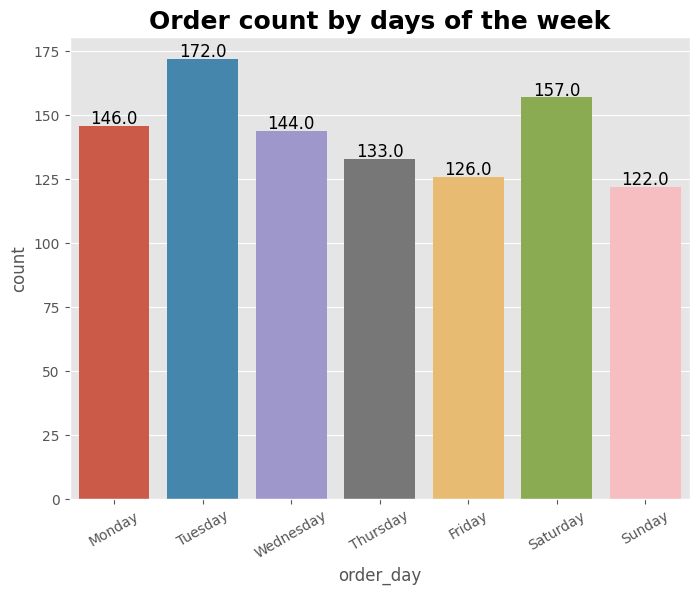

In [23]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df,x='order_day',order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Order count by days of the week',fontsize = 18,fontweight='bold')
plt.xticks(rotation = 30)
# annotation
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

most of the orders happen on Thursday and Saturday.

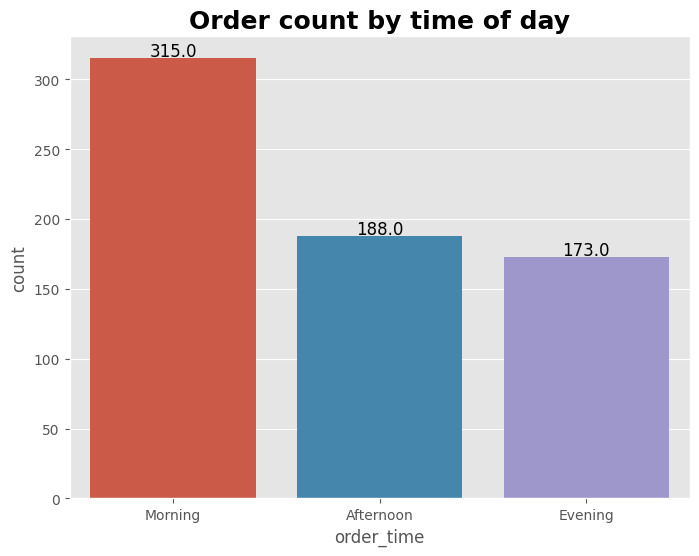

In [24]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df,x='order_time',order=['Morning', 'Afternoon', 'Evening'])
plt.title('Order count by time of day',fontsize = 18,fontweight='bold')
# annotation
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black',xytext=(0, 5),
                textcoords='offset points')

plt.show()

most of the orders happen in the morning.


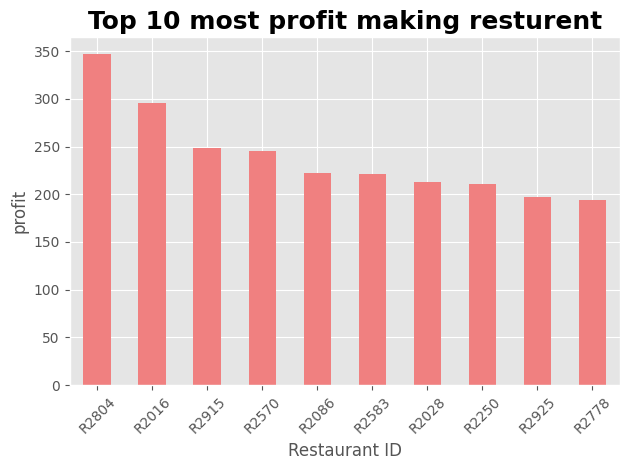

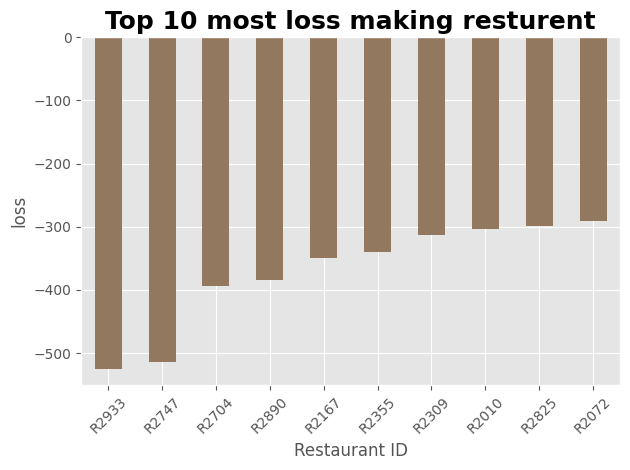

In [25]:
# list of top 10 restaurants based on profit and loss

df.groupby('Restaurant ID')['profit'].sum().nlargest(10).plot(kind='bar',color=random.choice(colors))
plt.title('Top 10 most profit making resturent',fontsize = 18,fontweight='bold')
plt.ylabel('profit')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

df.groupby('Restaurant ID')['profit'].sum().nsmallest(10).plot(kind='bar',color=random.choice(colors))
plt.title('Top 10 most loss making resturent',fontsize = 18,fontweight='bold')
plt.ylabel('loss')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

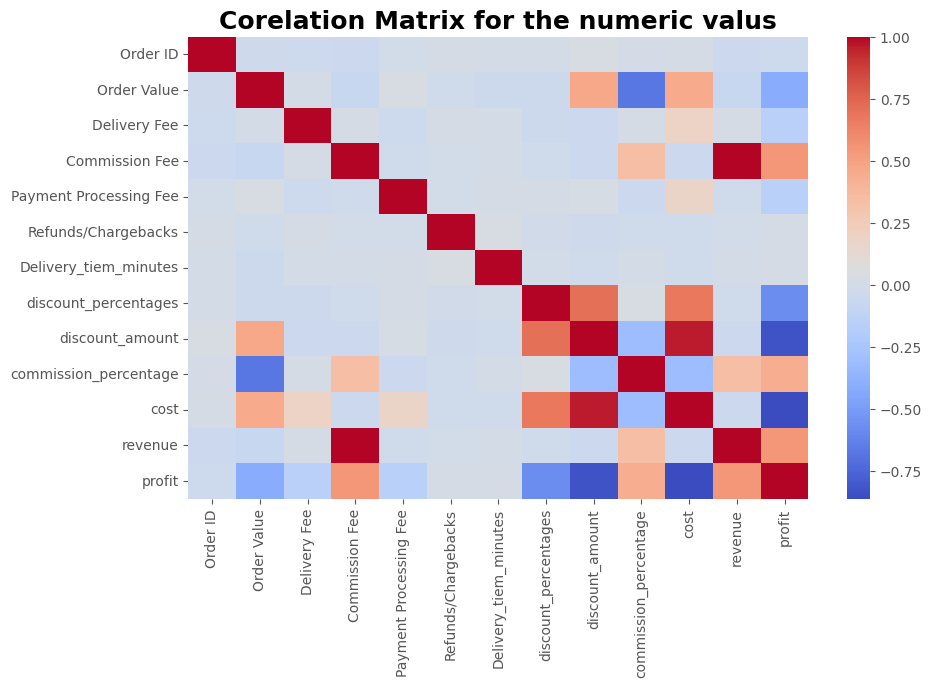

In [26]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(),cmap='coolwarm')
plt.title('Corelation Matrix for the numeric valus',fontsize = 18,fontweight='bold')
plt.show()

# Cost analysis:
-----------------------

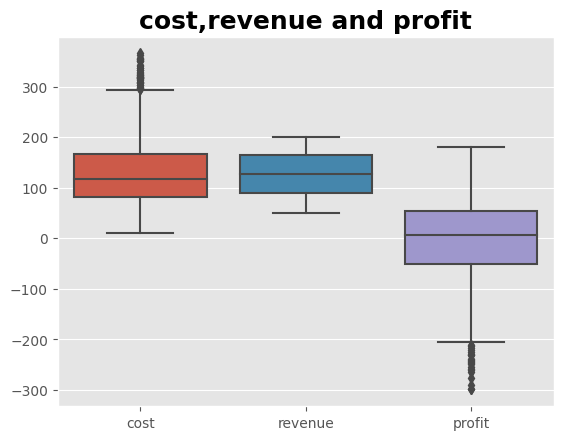

In [27]:
sns.boxplot(data=df[['cost','revenue','profit']])
plt.title('cost,revenue and profit',fontsize = 18,fontweight='bold')
plt.show()

We observe that while the costs and revenue are high, the profit is minimal.

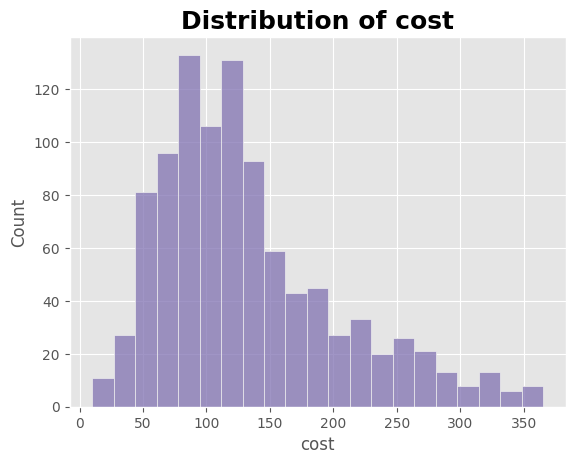

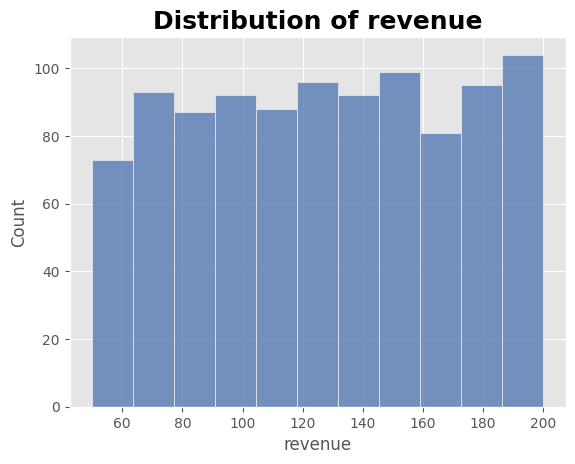

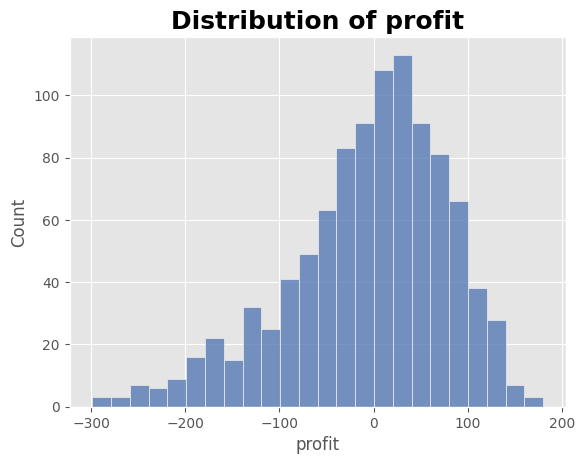

In [28]:
# Visualizing the distribution of cost,revenue and profit

sns.histplot(df['cost'],color=random.choice(colors))
plt.title('Distribution of cost',fontsize = 18,fontweight='bold')
plt.show()


sns.histplot(df['revenue'],color=random.choice(colors))
plt.title('Distribution of revenue',fontsize = 18,fontweight='bold')
plt.show()


sns.histplot(df['profit'],color=random.choice(colors))
plt.title('Distribution of profit',fontsize = 18,fontweight='bold')
plt.show()

# Revenue analysis:
--------------------------

The commission fee is our only source of revenue.

In [29]:
df[['Commission Fee','commission_percentage','revenue']].agg(['mean','max','min'])

,Commission Fee,commission_percentage,revenue
mean,126.99,19.75,126.99
max,200.00,169.09,200.00
min,50.00,2.61,50.00


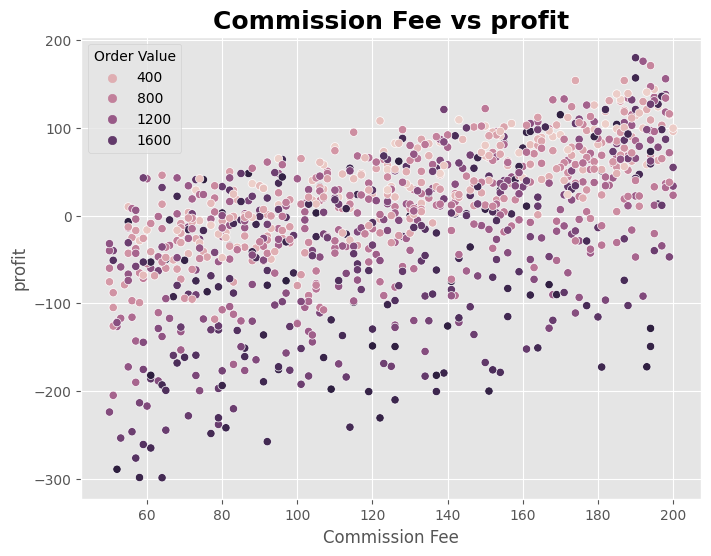

In [30]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Commission Fee',y='profit',data=df,hue='Order Value')
plt.title('Commission Fee vs profit',fontsize = 18,fontweight='bold')

plt.show()

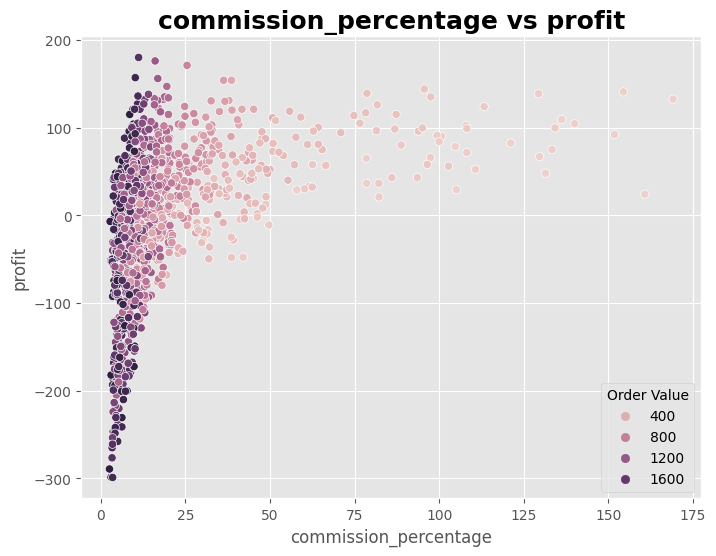

In [31]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='commission_percentage',y='profit',data=df,hue='Order Value')
plt.title('commission_percentage vs profit',fontsize = 18,fontweight='bold')

plt.show()

It shows that most of the profit and losses happened when the commission percentage was less than 50. it also indicated that all the higher percentages are applyed only when the order value in the range of 400.

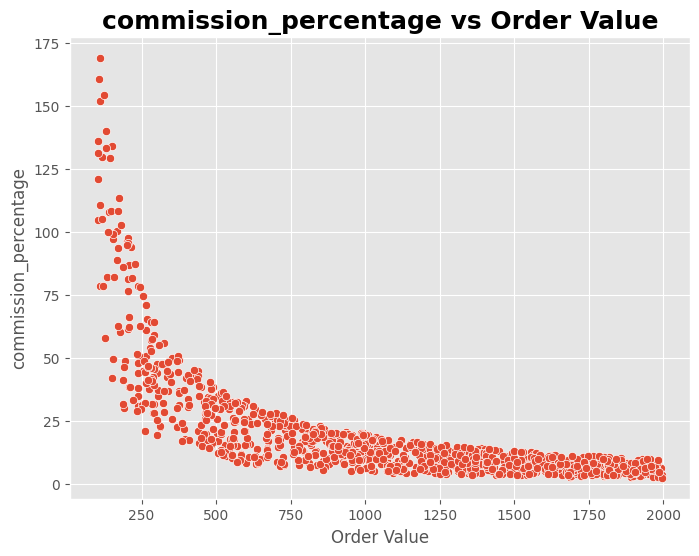

In [32]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Order Value',y='commission_percentage',data=df)
plt.title('commission_percentage vs Order Value',fontsize = 18,fontweight='bold')

plt.show()

It proves the previous indication that the higher the order value, the lower the commission percentage. Similarly, the commission percentage is 
exponentially increased when the order value is low.

# Profitability Analysis:
----------------------

In [33]:
df[['cost','revenue','profit']].agg(['sum','mean','max','min'])

,cost,revenue,profit
sum,132741.85,126990.00,-5751.85
mean,132.74,126.99,-5.75
max,365.40,200.00,180.00
min,10.00,50.00,-298.90


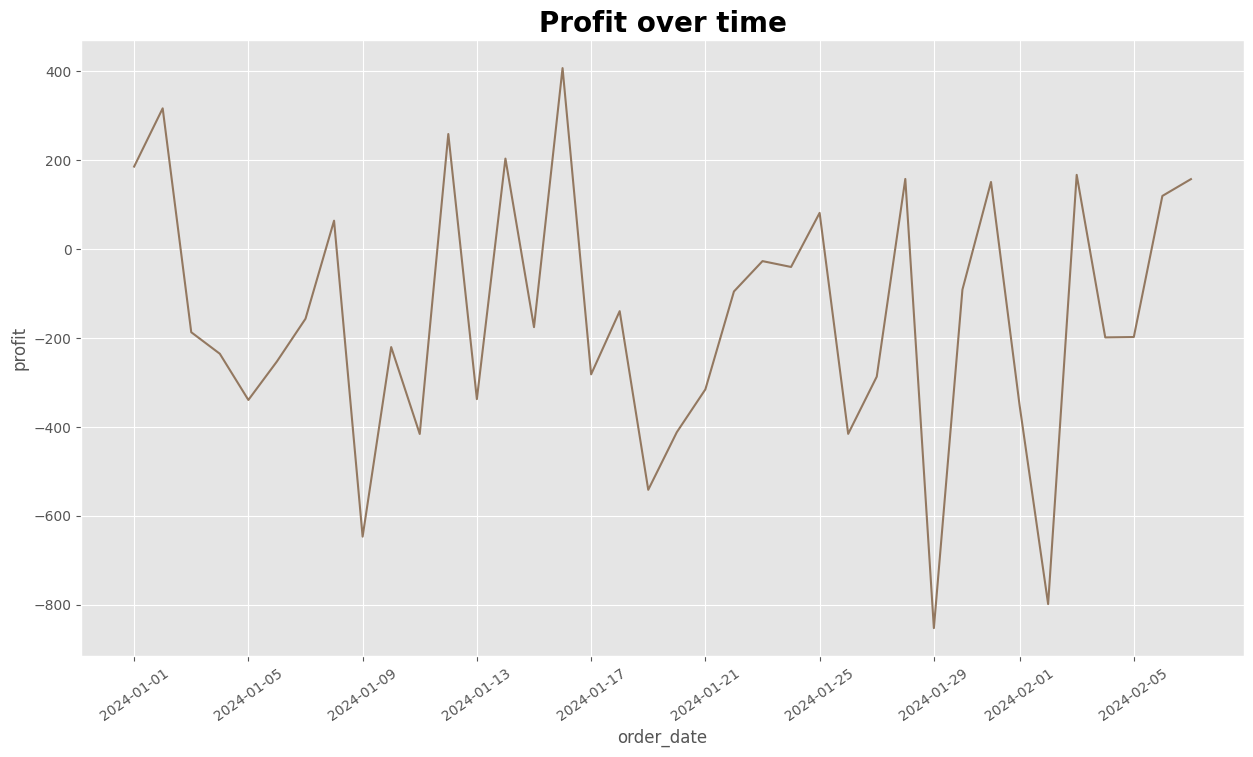

In [34]:

profit_by_date=df.groupby('order_date')['profit'].sum().reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(data=profit_by_date,x=profit_by_date['order_date'],y=profit_by_date['profit'],color=random.choice(colors))
plt.title('Profit over time',fontsize = 20,fontweight='bold')
plt.xticks(rotation =35)
plt.show()

From this chart, it is evident that the company has experienced significant losses over the past two months, and the profits are on a downward trend.

* To increase profits, we need to reduce costs and boost revenue. To achieve this, we must closely examine the main factors contributing to high costs.

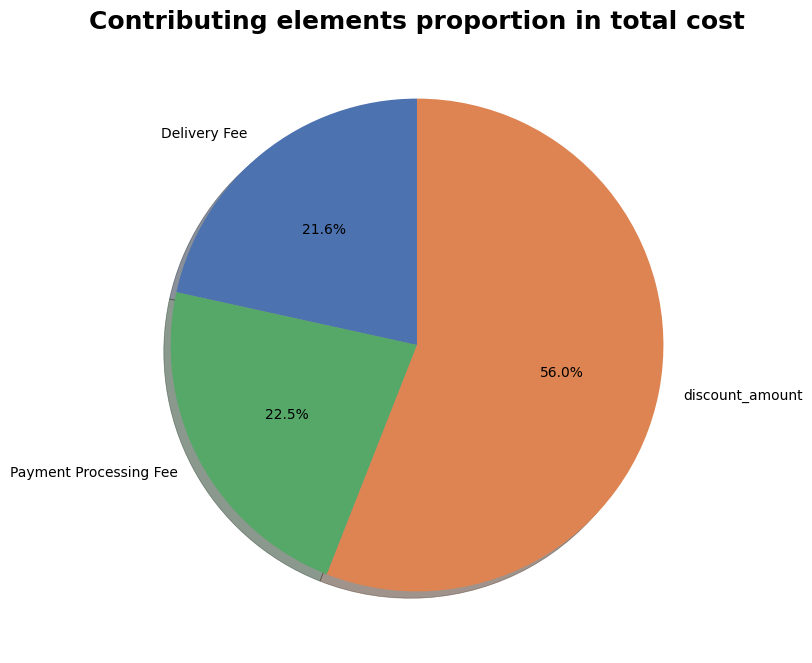

In [35]:
cost_distribution = df[['Delivery Fee','Payment Processing Fee','discount_amount']].sum()
plt.figure(figsize=(10,8))
plt.pie(x=cost_distribution,labels=cost_distribution.index,colors=random.sample(colors,len(cost_distribution)),autopct='%1.1f%%',
        shadow = True,startangle=90)
plt.title('Contributing elements proportion in total cost',fontsize = 18,fontweight='bold')
plt.show()

Based on the plot, we can see that there are three components contributing to the total cost. Among them, the discount amount is the major cost driver, responsible for 56% of the total cost. The payment processing fee and delivery fee follow behind. To reduce costs, our primary focus should be on lowering the discount amount.

## Discount analysis

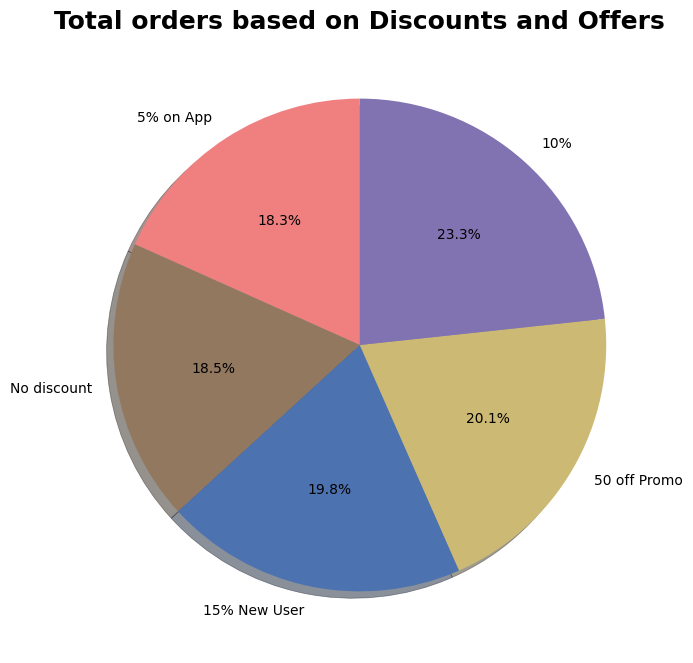

In [36]:
# replacing the null value with no offers
df['Discounts and Offers']=df['Discounts and Offers'].fillna('No offers')

orders = df.groupby('Discounts and Offers')['Order ID'].count().sort_values()
plt.figure(figsize=(10,8))
plt.pie(x=orders,labels=orders.index,autopct='%1.1f%%',colors=random.sample(colors,len(orders)),
        shadow = True,startangle=90)
plt.title('Total orders based on Discounts and Offers',fontsize = 18,fontweight='bold')
plt.show()

we can see that only 18.5% of the total orders have no discount, and the remaining 81.5% have some kind of discount. so we have to think carefully about how to decrease the discount because the majority of orders come from discount.

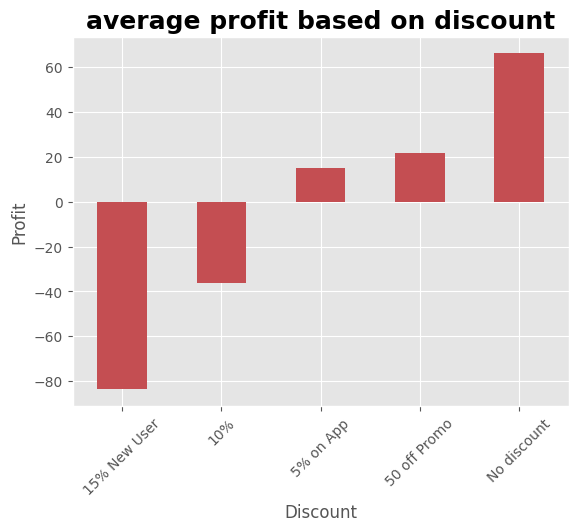

In [37]:

avg_profit = df.groupby('Discounts and Offers')['profit'].mean().sort_values()
avg_profit.plot(kind='bar',color=random.choice(colors))
plt.title('average profit based on discount',fontsize = 18,fontweight='bold')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.xticks(rotation = 45)
plt.show()

It became clear that the **15% New User** and **10%** discounts are mainly responsible for the losses, and most of the profit was generated by **No discount** and **50 off promo**.

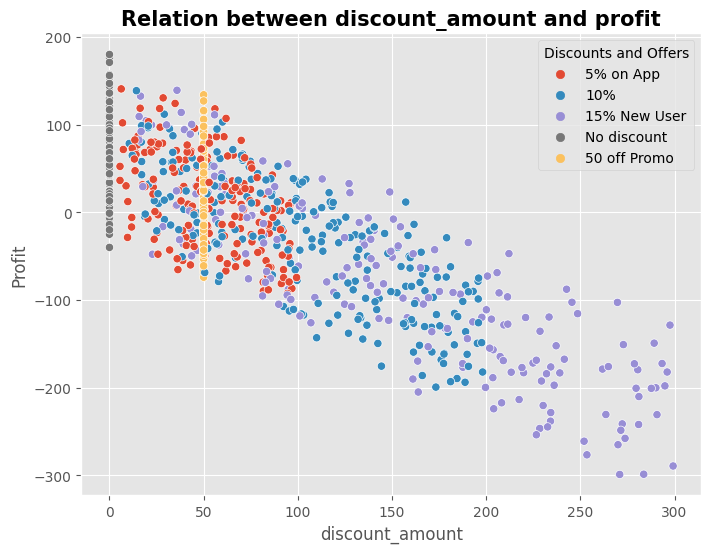

In [38]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='discount_amount',y='profit',data=df,hue='Discounts and Offers')
plt.title('Relation between discount_amount and profit',fontsize = 15,fontweight='bold')
plt.ylabel('Profit')
plt.xlabel('discount_amount')
plt.show()


Based on this plot, it became clear that the higher the discount amount, the greater the loss. It also confirms previous findings. The most severe loss occurred because of **15% New User** and **10%** discounts.

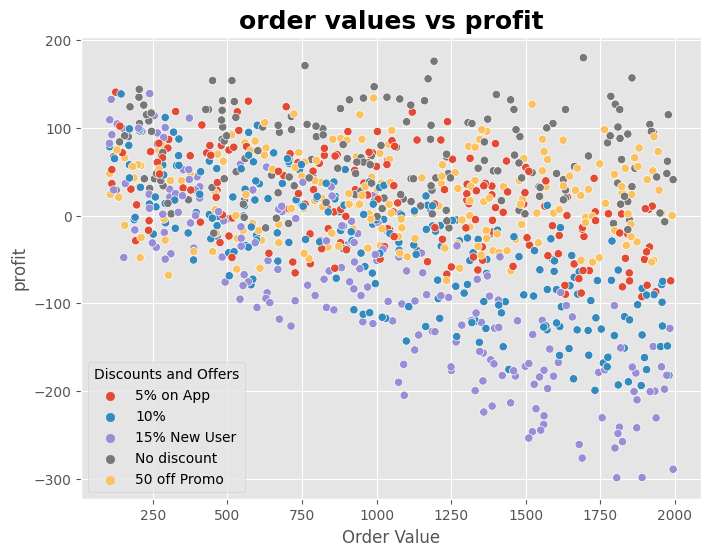

In [39]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Order Value',y='profit',data=df,hue='Discounts and Offers')
plt.title('order values vs profit',fontsize = 18,fontweight='bold')

plt.show()

Based on the analysis of the previous three plots, it is clear that higher-order values result in greater losses. Additionally, applying a **15% New User** or **10%** discount to higher order values leads to losses while using the same discounts to lower order values results in some profit. Similarly, offering **No discount** or a **50 off promo** on higher order values generates some profit.

## Conclusion
===============

### Cost Analysis
- **Overview:** The cost analysis reveals that while the average cost is slightly lower than the revenue, the resulting profit is minimal.
- **Statistics:**
  - **Cost:** Maximum = 365.40, Minimum = 10.00
  - **Revenue:** Maximum = 200.00, Minimum = 50.00
  - **Profit:** Maximum = 180.00, Minimum = -298.90
- **Insight:** The business is experiencing significant losses due to high costs and low revenues.

### Revenue Analysis
- **Overview:** Most profit and loss occur when the commission percentage is between 0 and 50%.
- **Key Findings:**
  - **High Order Values:** Low commission percentages
  - **Low Order Values:** High commission percentages
- **Actionable Insight:** Increase the commission percentage for higher order values to boost revenue.

### Profitability Analysis
- **Overview:** Over time, the company has sustained major losses, with costs surpassing revenue, leading to extremely low profits.
- **Cost Contributors:**
  - **Discount Amount:** 56% of total cost
  - **Payment Processing Fee:** 22% of total cost
  - **Delivery Fee:** 21% of total cost
- **Key Insight:** Discount amounts are the primary contributor to high costs. Reducing discount amounts is crucial to decreasing overall costs.

    #### Discount Analysis
    - **Order Distribution:**
      - **No Discount:** 18.5% of total orders
      - **With Discounts:** 81.5% of total orders
        - **10% Discount:** 23.3% of total orders
        - **50-off Promo:** 20.1% of total orders
        - **15% for New Users:** 19.8% of total orders
    - **Profit Impact:**
      - **Losses:** Primarily due to 15% new user discounts and 10% discounts when applied to higher order value
      - **Profits:** Mainly from no discount and 50-off promo orders and when 15% new user discounts and 10% discounts applied to lower order values
    - **Key Insight:** Higher discount amounts result in greater losses, especially for high order values.



## Recommendations
-----------------------
Based on the insights from the analysis, the following recommendations aim to decrease costs, increase revenue, and consequently, significantly enhance profitability.

### 1. Cost Reduction:
- **High-Value Orders:** For orders where the order value exceeds 1000 and currently have a '10%' discount:
  - Replace 70% of these orders with a '50-off promo'.
  - Replace the remaining 30% with 'No discount'.
  - **Reason:** This approach leverages the fact that '50-off promo' and 'No discount' orders have shown better profitability.
- **Low-Value Orders:** For orders where the order value is less than 500:
  - Replace all '50-off promo' discounts with a '10%' discount.
  - **Reason:** Lowering discounts for smaller orders helps balance the overall discount impact, maintaining customer incentives while reducing costs.
- **New Users:** Adjust the discount for new users:
  - Provide a '15%' discount only up to a maximum of 75.
  - **Reason:** This cap on new user discounts prevents high discount amounts from eroding profit margins on higher order values.

### 2. Revenue Boost:
- **Commission Fees:** To increase revenue, adjust the commission fee structure:
  - Increase the commission fee by 10% of the order value for every 500 increase in order value.
  - **Reason:** By aligning commission fees with order values, we can better capture revenue from higher-value orders, where the current commission is disproportionately low.


## Impact Simulation of Proposed Strategies:
---------------------
Useing the given dataset to simulate the financial impact of the recommended strategies.

Based on the anlysis if we want to increase the profit mergin for each order then we have take two crucial step to reduce the cost and boost the revenue as much as possible with out impaciing on nuber of orders.

1. the first step is to ruduce the cost.
2. the second step is for boost the revenue.
    

### Loding Dataset for simulation:

In [40]:
df_original= df.copy() # creating a data frame for storing the original dataset.
df_update=df.copy() # creating a data frame for storing the merged dataset for both strategies.
df_cost=df.copy() # creating a data frame for storing the cost reduction dataset.
df_revenue=df.copy() # creating a data frame for storing the revenue boost dataset.

### Crating function to Compare the recalculated financial metrics of each scenario with the baseline

In [41]:


def comparison_with_baseline(df_original,df_update):
    # difinig the current baseline
    original_sums = df_original[['cost', 'revenue', 'profit']].sum()
    # updated baseline
    updated_sums = df_update[['cost', 'revenue', 'profit']].sum()
    
    # Calculate the differences and percentage changes
    differences = updated_sums - original_sums
    percentage_changes = (differences / abs(original_sums)) * 100
    
    # Prepare data for plotting
    sums_df = pd.DataFrame({
        'Metrics': ['cost', 'revenue', 'profit'],
        'Original': original_sums.values,
        'Updated': updated_sums.values
    }).melt(id_vars='Metrics', value_vars=['Original', 'Updated'], var_name='Version', value_name='Sum')
    
    percentage_changes_df = pd.DataFrame({
        'Metrics': ['cost', 'revenue', 'profit'],
        'Percentage Change': percentage_changes.values
    })
    
    # Plot the sums using seaborn
    plt.figure(figsize=(14, 6))
    
    # Bar plot for original and updated sums
    plt.subplot(1, 2, 1)
    ax=sns.barplot(x='Metrics', y='Sum', hue='Version', data=sums_df)
    plt.title('Original vs Updated Sums')
    plt.xlabel('Metrics')
    plt.ylabel('Sum')
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 8),
                    textcoords='offset points')
    
    
    # Bar plot for percentage changes
    plt.subplot(1, 2, 2)
    ax =sns.barplot(x='Metrics', y='Percentage Change', data=percentage_changes_df)
    plt.title('Percentage Change in Sums')
    plt.xlabel('Metrics')
    plt.ylabel('Percentage Change (%)')
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 8),
                    textcoords='offset points')
    
    # Display the plots
    plt.tight_layout()
    plt.show()

### 1. Cost Reduction:
Based on the insights, the optimal strategy for reducing the cost without significantly affecting sales includes:

1. Apply a cap of 75 on discounts for **new users**.
2. When order values are more than or equal to 1000, reduce the **10%** discount to a **50-off promo** for 70% of total orders and the remaining 30% give **no discount**.
3. When the order value is less than or equal to 500, replace the 50-off promo with a 10% discount.

#### key variable:
The main variables for this strategy are **Discounts and Offers, discount_percentage,and discount_amount.**
    


#### Adjust the Dataset for Each Scenario:
##### 1. Apply a cap of **75** on discounts for **new users**.

In [42]:
# When the order value is more than 500 and Discounts and Offers is 15% New User replace discount_amount with 75

df1=df_cost[(df_cost['Order Value']>500) & (df_cost['Discounts and Offers']=='15% New User')]
df1.loc[:,'discount_amount']=75

##### 2. When order values are more than or equal to **1000** Reduce the **10%** discount to a **50-off promo** for 70% of total orders and the remaining 30% give **no discount**.

In [43]:
# Filtering the data frame :
df2=df_cost[(df_cost['Order Value']>=1000) & (df_cost['Discounts and Offers']=='10%')]

# calculating the 70% and 30% of total orders

total_orders = len(df2)
new_50= int(total_orders*0.7)
new_0=total_orders-new_50

# Creating a random sample

df2=df2.sample(frac = 1).reset_index(drop=True)

# replacing the value

df2.loc[:new_50-1,'discount_amount'] = 50
df2.loc[new_50:,'discount_amount'] = 0


##### 3. When order value is less than or equal to **500** then replace all the **50-off promo** to **10%**

In [44]:
# Filtering the data frame :
df3=df_cost[(df_cost['Order Value']<=500) & (df_cost['Discounts and Offers']=='50 off Promo')]
# replacing the value
df3.loc[:, 'discount_percentage'] = 10

#### Merging the dataset to create a dataset for Cost reduction strategy

In [45]:
# Set the index for all the datasets to Order ID
df_cost.set_index('Order ID', inplace=True)
df1.set_index('Order ID', inplace=True)
df2.set_index('Order ID', inplace=True)
df3.set_index('Order ID', inplace=True)
# Updating df_cost with all the datasets for each step
df_cost.update(df1)
df_cost.update(df2)
df_cost.update(df3)
# reseting the index
df_cost.reset_index(inplace = True)

#### Recalculate the Cost, Revenue, and Profit for Cost reduction strategy

In [46]:
df_cost['cost'] = df_cost['Delivery Fee'] + df_cost['Payment Processing Fee'] + df_cost['discount_amount']
df_cost['revenue'] = df_cost['Commission Fee']
df_cost['profit'] = df_cost['revenue'] - df_cost['cost']

#### Compare with Baseline and Visualize the Results:

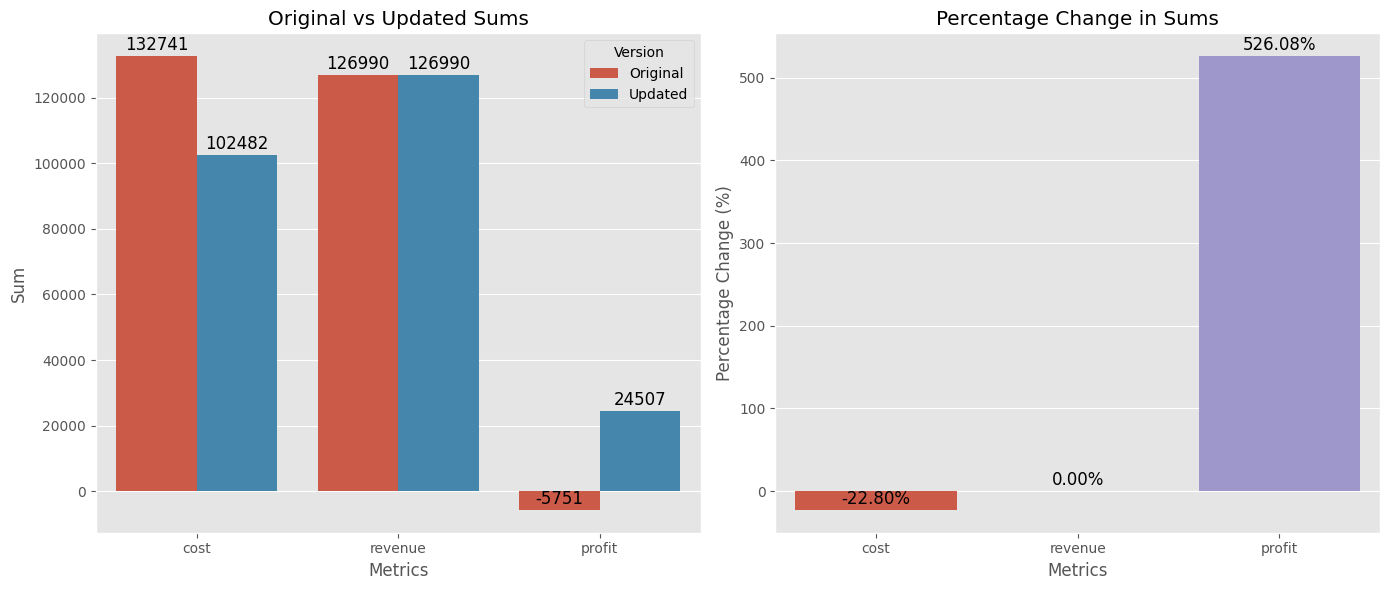

In [47]:
# call function to generate the plot:
comparison_with_baseline(df_original,df_cost)

#### Conclusion for Cost reduction strategy:
    comparing both the original and the updated dataset we can see that the Cost has decreased by more than 22% and profit has increased by more than 526%


### 2. Revenue Boost
    To boost revenue, we can increase commission fees by 10% of the order value for every 500 increase in order value.

#### key variable:
the main variable for this strategy is the **Commission Fee**. 

#### Adjust the Dataset

In [48]:
# Function to calculate the additional commission fee
def calculate_additional_commission(order_value, commission_fee):
    increment = 500
    # Calculate the number of increments
    num_increments = (order_value // increment)
    
    # Calculate the additional commission fee
    additional_fee = num_increments * 0.1 * order_value
    
    # Update the commission fee
    new_commission_fee = commission_fee + additional_fee
    return new_commission_fee

# Apply the function to update the commission fee
df_revenue['Commission Fee'] = df_revenue.apply(lambda row: calculate_additional_commission(row['Order Value'], row['Commission Fee']), axis=1)

#### Recalculate the Cost, Revenue, and Profit for Revenue Boost strategy

In [49]:
df_revenue['cost'] = df_revenue['Delivery Fee'] + df_revenue['Payment Processing Fee'] + df_revenue['discount_amount']
df_revenue['revenue'] = df_revenue['Commission Fee']
df_revenue['profit'] = df_revenue['revenue'] - df_revenue['cost']

#### Compare with Baseline and Visualize the Results:

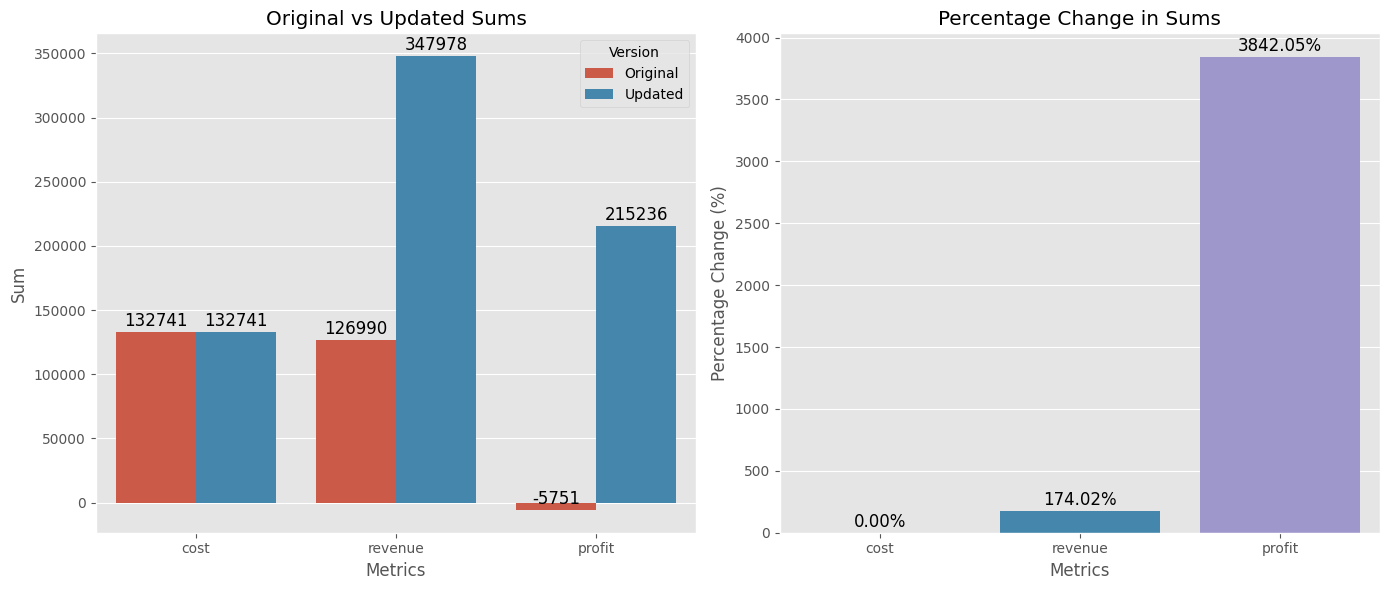

In [50]:
# call function to generate the plot:
comparison_with_baseline(df_original,df_revenue)

#### Conclusion for Revenue Boost strategy:
comparing both the original and the updated dataset we can see that th revenue has increasedd by more tha **174%**  and profit has increased by more than  **38426**%

### 3. Merging both the Cost Reduction and Revenue Boost dataset

In [51]:
# set the index for df_update to Order ID
df_update.set_index('Order ID',inplace=True)
# key variable for cost reduction that will be updated in df_updata
columns_to_update_cost = ['Discounts and Offers', 'discount_percentages', 'discount_amount'] 
df_update.update(df_cost.set_index('Order ID')[columns_to_update_cost])
# key variable for revenue boost that will be updated in df_updata
columns_to_update_revenue = ['Commission Fee']
df_update.update(df_revenue.set_index('Order ID')[columns_to_update_revenue])
# reset the index of df_update
df_update.reset_index(inplace = True)

### Recalculate the Cost, Revenue, and Profit for the merged dataset

In [52]:
df_update['cost'] = df_update['Delivery Fee'] + df_update['Payment Processing Fee'] + df_update['discount_amount']
df_update['revenue'] = df_update['Commission Fee']
df_update['profit'] = df_update['revenue'] - df_update['cost']

### Compare with Baseline and Visualize the Results:

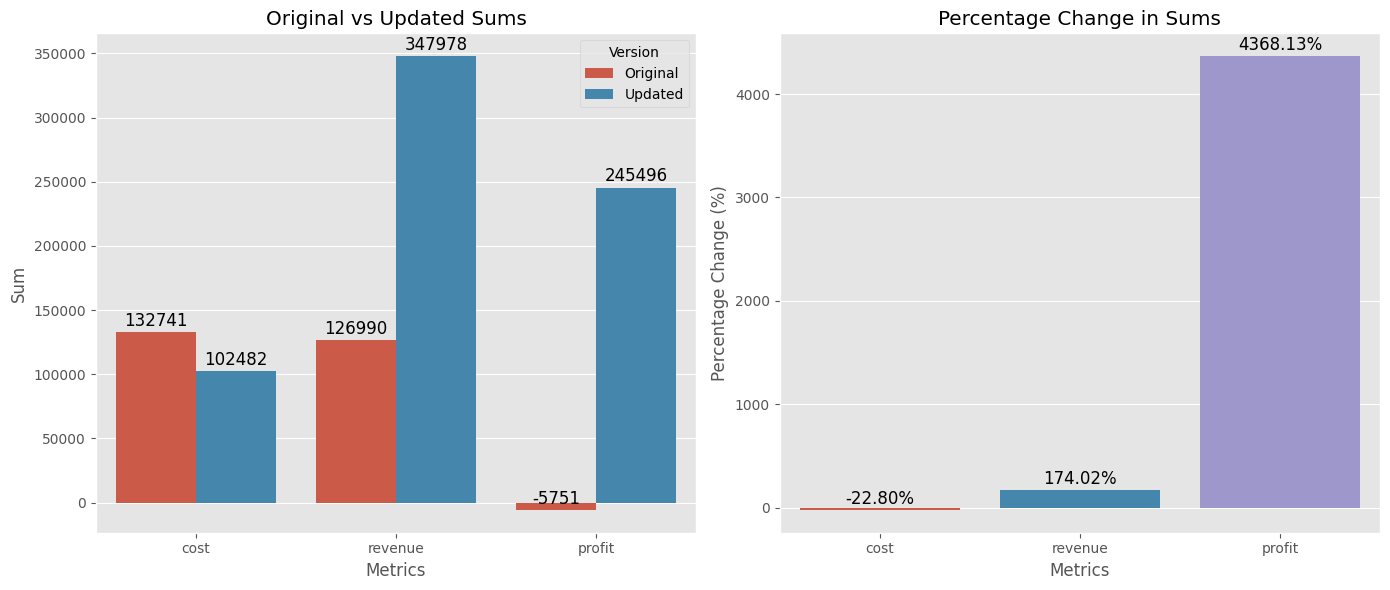

In [53]:
# call function to generate the plot:
comparison_with_baseline(df_original,df_update)

### Conclusion for both strategies:
Implementing the proposed cost reduction and revenue boost strategies is expected to decrease **Cost** by **22%**, increase **Revenue** by **174%**, and boost **Profit** by **4368%**. These strategies are highly recommended for improving the financial health of the business.

------------